In [1]:
# import important modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.tokenize import RegexpTokenizer, TweetTokenizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics, svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import joblib
import pickle
import warnings
warnings.filterwarnings("ignore")
# seeding
np.random.seed(123)
# load data



In [3]:
# warnings.filterwarnings("ignore")
# # seeding
# np.random.seed(123)
data = pd.read_csv('data/Twitter_Data.csv')
categories = [-1, 0, 1]
# data.head()
# len(data)
data.isnull().any().any()
data.isnull().any()
data = data.dropna(subset=['clean_text','category'])
# data['clean_text','category'].isnull().sum()
# data.isnull().any().any()
# data.isnull().any()
data.isnull().any()

clean_text    False
category      False
dtype: bool

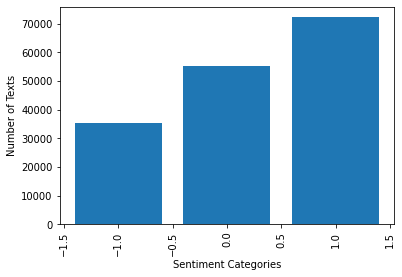

,clean_text
category,
-1.0,35509
0.0,55211
1.0,72249


In [4]:
def visualize():
    category_count = data.groupby('category').count()
    plt.bar(category_count.index.values, category_count["clean_text"])
    plt.xticks(rotation='vertical')
    plt.xlabel('Sentiment Categories')
    plt.ylabel('Number of Texts')
    plt.show()
    return category_count
visualize()

In [5]:
def feature_gen_with_TFIDF():
    token = TweetTokenizer()
    tf = TfidfVectorizer(tokenizer=token.tokenize,stop_words="english")
    text_tf = tf.fit_transform(data['clean_text'])
    #  x_train, x_test, y_train, y_test
    return train_test_split(text_tf, data['category'], test_size=0.3, random_state=1212)

def feature_gen_with_CV():
    token = TweetTokenizer()
    cv = CountVectorizer(lowercase=True, stop_words="english",
                         ngram_range=(1, 1), tokenizer=token.tokenize)
    text_counts = cv.fit_transform(data['clean_text'])
    return train_test_split(text_counts, data['category'], test_size=0.3, random_state=1212)

def calculate_accuracy(x_train, x_test, y_train, y_test, model=None, model_filename = None):
    clf = MultinomialNB().fit(x_train, y_train)
    print("x_test", type(x_test))
    if model == "SVM":
        clf = svm.SVC(kernel='linear').fit(x_train, y_train)

    predicted = clf.predict(x_test)
    accuracy_score = metrics.accuracy_score(y_test, predicted)

    if not model_filename : model_filename = "model_trained"
    # joblib.dump(clf,"/content/drive/MyDrive/Colab Notebooks/Sentiment Analysis/trained_models/"+ model_filename+'.pkl')
    
    # file_name = "/content/drive/MyDrive/Colab Notebooks/Sentiment Analysis /trained_models/" + model_filename +'.pkl'
    # with open(file_name, 'wb') as handle:
    #     pickle.dump(clf, handle, protocol=pickle.HIGHEST_PROTOCOL) 
    # f = open(file_name,'wb')
    # pickle.dump(clf,f)
    # f.close()

    return accuracy_score, predicted
def train_model(model=None, model_filename = None):
    token = TweetTokenizer()
    cv = CountVectorizer(lowercase=True, stop_words="english",
                         ngram_range=(1, 1), tokenizer=token.tokenize)
    x = data['clean_text']
    y = data['category']

    clf = MultinomialNB().fit(x_train, y_train)
    print("x_test", type(x_test))
    if model == "SVM":
        clf = svm.SVC(kernel='linear').fit(x_train, y_train)

    predicted = clf.predict(x_test)
    accuracy_score = metrics.accuracy_score(y_test, predicted)

    if not model_filename : model_filename = "model_trained"
    # joblib.dump(clf,"/content/drive/MyDrive/Colab Notebooks/Sentiment Analysis/trained_models/"+ model_filename+'.pkl')
    
    # file_name = "/content/drive/MyDrive/Colab Notebooks/Sentiment Analysis /trained_models/" + model_filename +'.pkl'
    # with open(file_name, 'wb') as handle:
    #     pickle.dump(clf, handle, protocol=pickle.HIGHEST_PROTOCOL) 
    # f = open(file_name,'wb')
    # pickle.dump(clf,f)
    # f.close()

    return accuracy_score, predicted

In [6]:
# with  CV
x_train, x_test, y_train, y_test = feature_gen_with_CV()

In [7]:
# with  TF_IDF
xtrain, xtest, ytrain, ytest = feature_gen_with_TFIDF()

In [8]:
CV_NB = calculate_accuracy(x_train, x_test, y_train, y_test,model_filename = "CV_MNB_model")

x_test <class 'scipy.sparse._csr.csr_matrix'>


In [ ]:
CV_SVM = calculate_accuracy(x_train, x_test, y_train, y_test, model = "SVM",model_filename = "CV_SVM_model")


In [ ]:
TF_NB = calculate_accuracy(xtrain, xtest, ytrain, ytest,model_filename = "TF_MNB_model")


In [ ]:
TF_SVM = calculate_accuracy(xtrain, xtest, ytrain, ytest, model = "SVM",model_filename = "TF_MNB_model")

In [ ]:
print(CV_NB[1],TF_NB[1])



In [ ]:
from sklearn.pipeline import Pipeline
x = data['clean_text']
y = data.category.values
x_train, x_valid, y_train, y_valid = train_test_split(x,y,test_size=0.15,random_state=42,shuffle=True,stratify=y)
sent_clf = Pipeline(steps=[('pre_processing', CountVectorizer(lowercase=False, stop_words='english')), ('naive_bayes', MultinomialNB())])
sent_clf.fit(x_train, y_train)

In [ ]:
y_predictions = sent_clf.predict(x_valid)


In [ ]:
metrics.accuracy_score(y_valid,y_predictions)

In [ ]:
model_filename = "trained_model1"
file_name = "models/" + model_filename +'.pkl'
f = open(file_name,'wb')
pickle.dump(sent_clf,f)
f.close()